In [55]:
import pandas as pd
import numpy as np

# load the excel file
df = pd.read_excel("myexcel.xlsx")

# preview the data
print(df.head())         # shows the first 5 rows of data frame by default

            Name            Team  Number Position  Age               Height  \
0  Avery Bradley  Boston Celtics       0       PG   25  2023-02-06 00:00:00   
1    Jae Crowder  Boston Celtics      99       SF   25  2023-06-06 00:00:00   
2   John Holland  Boston Celtics      30       SG   27  2023-05-06 00:00:00   
3    R.J. Hunter  Boston Celtics      28       SG   22  2023-05-06 00:00:00   
4  Jonas Jerebko  Boston Celtics       8       PF   29  2023-10-06 00:00:00   

   Weight            College     Salary  
0     180              Texas  7730337.0  
1     235          Marquette  6796117.0  
2     205  Boston University        NaN  
3     185      Georgia State  1148640.0  
4     231                NaN  5000000.0  


In [56]:
df       # shows the full data frame data 

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,2023-02-06 00:00:00,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,2023-06-06 00:00:00,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,2023-05-06 00:00:00,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,2023-05-06 00:00:00,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,2023-10-06 00:00:00,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,2023-03-06 00:00:00,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,2023-01-06 00:00:00,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,2023-03-07 00:00:00,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


In [57]:
# Preprocessing: Correcting the data in the "height" column by replacing it with random numbers between 150 and 180. 

# replace height values 
df['Height'] = np.random.randint(150,181,size=len(df))

In [58]:
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,173,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,155,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,152,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,172,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,150,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,151,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,164,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,173,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,151,231,Kansas,947276.0


In [59]:
# Analysis Tasks: 
# 1. Determining the distribution of employees across each team and calculate the percentage split relative to the total number of employees.

# distribution of employees across each team
team_count = df['Team'].value_counts()

# percentage split per team 
team_percent = (team_count/len(df))*100

# combining them into a new dataframe
team_summary = pd.DataFrame({'Teamcount':team_count, 'Percentage':team_percent.round(2)})
print(team_summary)

                        Teamcount  Percentage
Team                                         
New Orleans Pelicans           19        4.15
Memphis Grizzlies              18        3.93
Utah Jazz                      16        3.49
New York Knicks                16        3.49
Milwaukee Bucks                16        3.49
Brooklyn Nets                  15        3.28
Portland Trail Blazers         15        3.28
Oklahoma City Thunder          15        3.28
Denver Nuggets                 15        3.28
Washington Wizards             15        3.28
Miami Heat                     15        3.28
Charlotte Hornets              15        3.28
Atlanta Hawks                  15        3.28
San Antonio Spurs              15        3.28
Houston Rockets                15        3.28
Boston Celtics                 15        3.28
Indiana Pacers                 15        3.28
Detroit Pistons                15        3.28
Cleveland Cavaliers            15        3.28
Chicago Bulls                  15 

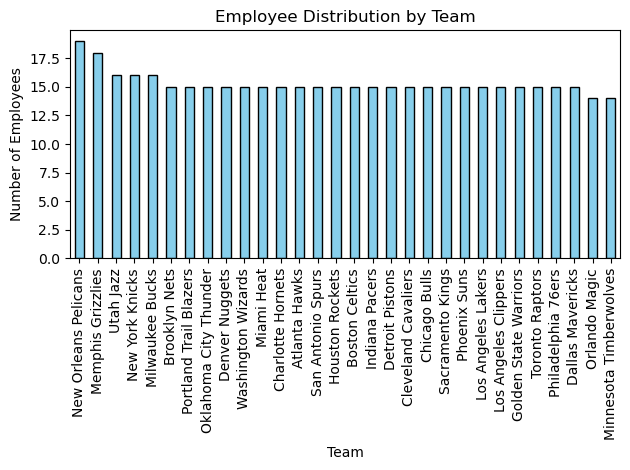

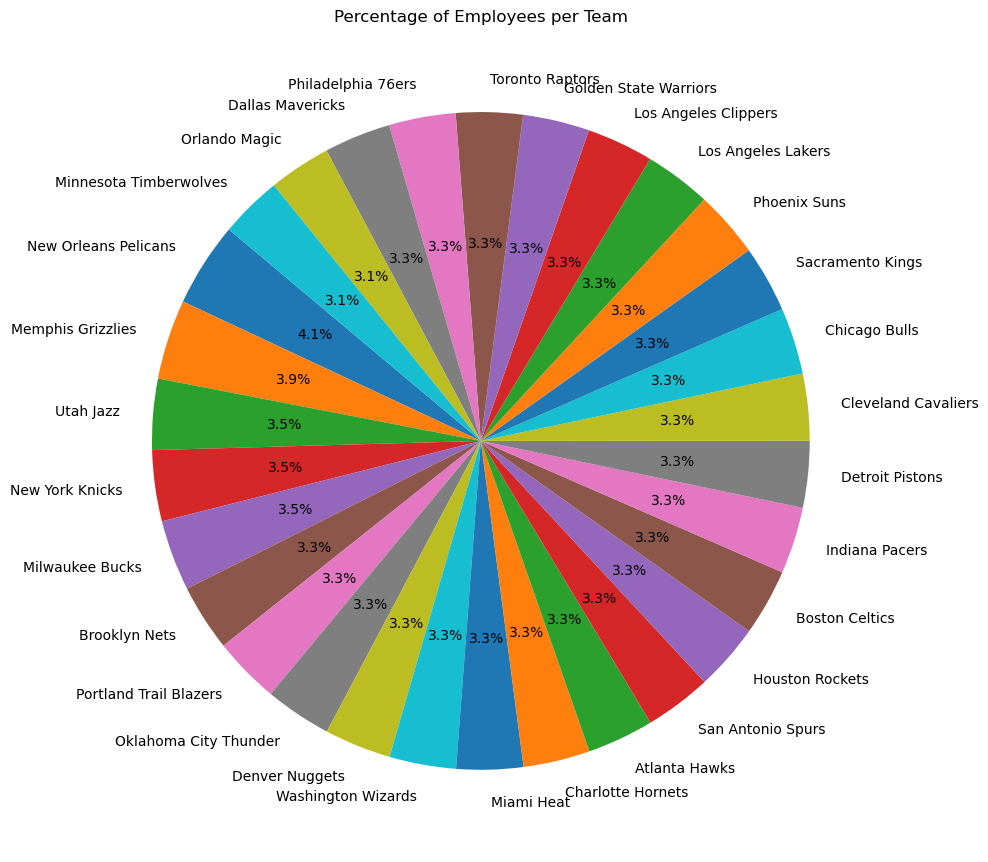

In [60]:
# graphical representation
import seaborn as sns
import matplotlib.pyplot as plt

# Task 1
# Bar chart - Employee Count per Team
team_summary['Teamcount'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Employee Distribution by Team')
plt.xlabel('Team')
plt.ylabel('Number of Employees')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Pie chart - Percentage per Team
plt.figure(figsize=(10,10))
team_summary['Percentage'].plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Employees per Team')
plt.ylabel('')  # Hide y-label for cleaner look
plt.tight_layout()
plt.show()

In [61]:
# 2. Segregating employees based on their positions within the company.
position_count = df['Position'].value_counts()

# combining it to a new data frame for better display
team_position_count = pd.DataFrame({'Count':position_count})
print(team_position_count)

          Count
Position       
SG          102
PF          100
PG           92
SF           85
C            79


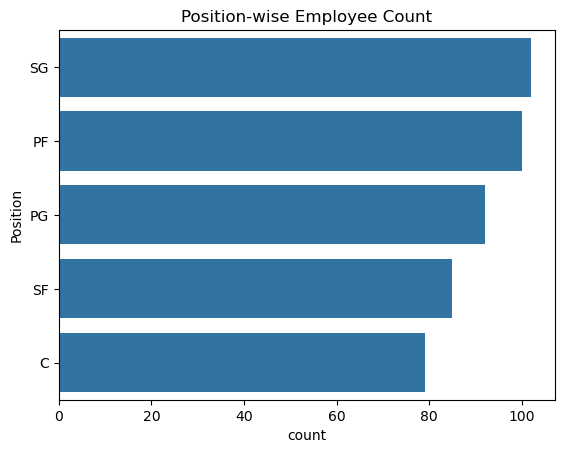

In [62]:
# graphical representation
# Task 2 - Position-wise Employee Count
sns.countplot(data=df, y='Position', order=df['Position'].value_counts().index)
plt.title('Position-wise Employee Count')
plt.show()

In [63]:
# 3. Identifying the predominant age group among employees. 
age_bins = [18, 25, 35, 45, 60]
age_labels = ['18-25', '26-35', '36-45', '46-60']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)
age_group_counts = df['Age_Group'].value_counts()
print(age_group_counts)

Age_Group
26-35    235
18-25    200
36-45     23
46-60      0
Name: count, dtype: int64


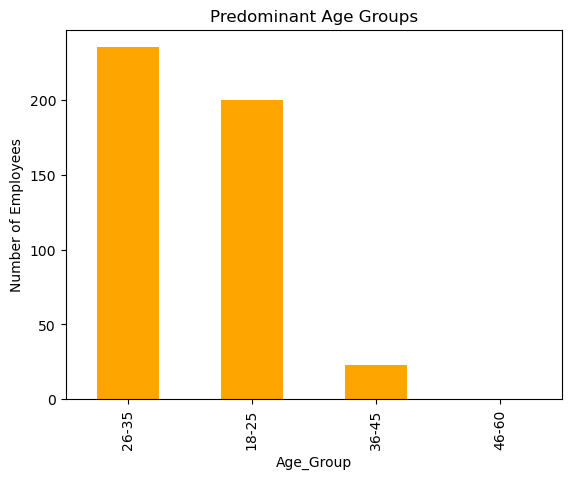

In [64]:
# graphical representation
# Task 3 - Predominant age groups
age_group_counts.plot(kind='bar', color='orange')
plt.title('Predominant Age Groups')
plt.ylabel('Number of Employees')
plt.show()

In [65]:
# 4. Discovering which team and position have the highest salary expenditure.
# Total salary by team and position
team_salary = df.groupby('Team')['Salary'].sum()
position_salary = df.groupby('Position')['Salary'].sum()

# Finding team with highest salary
team_highest_salary = team_salary.idxmax()
t_highest_salary = team_salary.max()

# Finding position with highest salary
position_highest_salary = position_salary.idxmax()
pos_highest_salary = position_salary.max()

print(f"Team with highest salary: {team_highest_salary} (₹{t_highest_salary})")
print(f"Position with highest salary: {position_highest_salary} (₹{pos_highest_salary})")

Team with highest salary: Cleveland Cavaliers (₹106988689.0)
Position with highest salary: C (₹466377332.0)


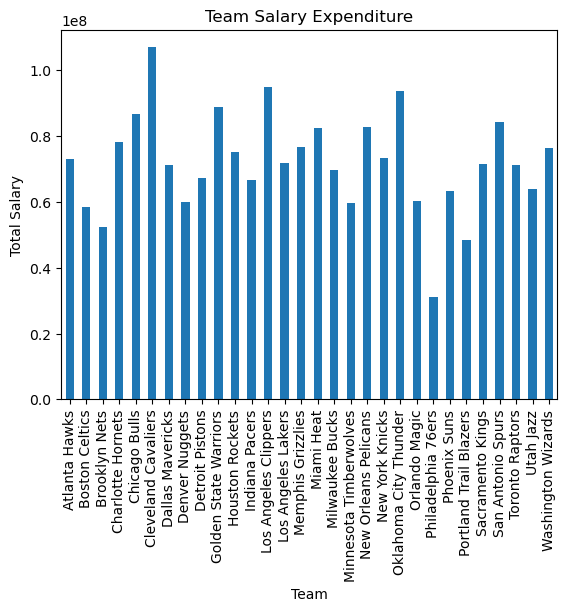

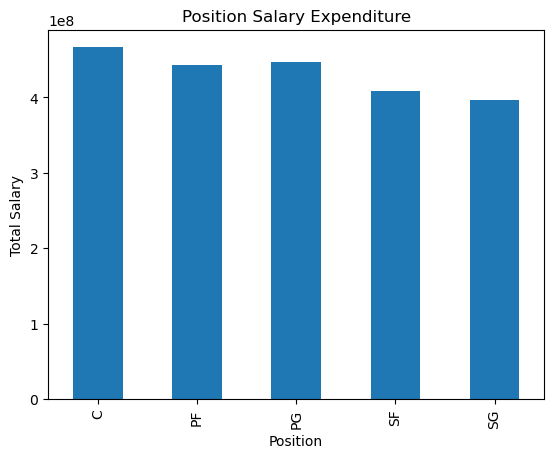

In [66]:
# graphical representation
# Task 4
team_salary.plot(kind='bar', title='Team Salary Expenditure', ylabel='Total Salary')
plt.show()
position_salary.plot(kind='bar', title='Position Salary Expenditure', ylabel='Total Salary')
plt.show()

Correlation between age and salary : 0.214


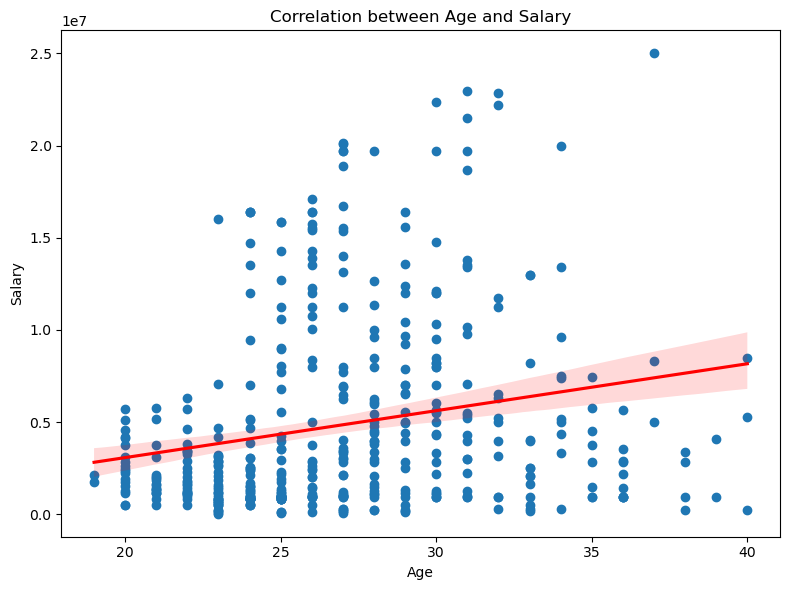

In [67]:
# 5. Investigating if there's any correlation between age and salary, and represent it visually.
correlation = df['Age'].corr(df['Salary'])
print(f"Correlation between age and salary : {correlation:.3f}")


# graphical representation of correlation between age and salary
# scatter plot with regression lines
plt.figure(figsize=(8, 6))
sns.regplot(x='Age', y='Salary', data=df, scatter_kws={'alpha':1}, line_kws={'color': 'red'})
plt.title('Correlation between Age and Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()